In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lc = ['Age','Workclass','Fnlwgt','Education','education_num','martial_status','occupation','relationship','race',
      'sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df = pd.read_csv('adult.csv',names=lc)
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.isin([' ?']).any()

Age               False
Workclass          True
Fnlwgt            False
Education         False
education_num     False
martial_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
income            False
dtype: bool

In [5]:
df['Workclass'] = df['Workclass'].replace(' ?',' Private')
df['occupation'] = df['occupation'].replace(' ?',' Other-service')
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [6]:
df['native_country'] = df['native_country'].replace(' ?',' United-States')
df.drop('Education', inplace=True, axis=1)
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
education_num      int64
martial_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Workclass'] = lb.fit_transform(df['Workclass'])
df['martial_status'] = lb.fit_transform(df['martial_status'])
df['occupation'] = lb.fit_transform(df['occupation'])
df['relationship'] = lb.fit_transform(df['relationship'])
df['race'] = lb.fit_transform(df['race'])
df['sex'] = lb.fit_transform(df['sex'])
df['native_country'] = lb.fit_transform(df['native_country'])
df['income'] = lb.fit_transform(df['income'])

In [8]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

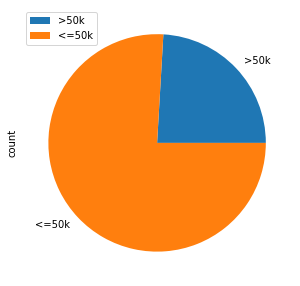

In [9]:
LabelDist = pd.DataFrame({'Label': [1, 0],'count': [7841,24720]},index=['>50k', '<=50k'])
plot = LabelDist.plot.pie(y='count', figsize=(5, 5))

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
def apply(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('Predictions\n',y_pred)
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))
    CM = confusion_matrix(y_test,y_pred)
    print('Confusion_matrix\n',CM)
    print('Classification_report\n',classification_report(y_test,y_pred))

In [15]:
#Decision Tree
m1 = DecisionTreeClassifier(criterion='entropy',max_depth=12,min_samples_split=14)
apply(m1,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 ... 0 0 0]
Training Score 0.8759981572481572
Testing Score 0.8544449562413634
Confusion_matrix
 [[4616  325]
 [ 623  949]]
Classification_report
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4941
           1       0.74      0.60      0.67      1572

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [16]:
# Random Forest
m2 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=12,min_samples_split=14)
apply(m2,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 ... 0 0 0]
Training Score 0.8741170147420148
Testing Score 0.8622754491017964
Confusion_matrix
 [[4733  208]
 [ 689  883]]
Classification_report
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4941
           1       0.81      0.56      0.66      1572

    accuracy                           0.86      6513
   macro avg       0.84      0.76      0.79      6513
weighted avg       0.86      0.86      0.85      6513



In [19]:
# KNN
m3 = KNeighborsClassifier(n_neighbors=29)
apply(m3,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 ... 0 0 0]
Training Score 0.8015970515970516
Testing Score 0.8003992015968064
Confusion_matrix
 [[4901   40]
 [1260  312]]
Classification_report
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      4941
           1       0.89      0.20      0.32      1572

    accuracy                           0.80      6513
   macro avg       0.84      0.60      0.60      6513
weighted avg       0.82      0.80      0.75      6513



In [20]:
# Logistic Reg
m4 = LogisticRegression(solver='liblinear')
apply(m4,x_train,x_test,y_train,y_test)

Predictions
 [0 1 0 ... 0 0 0]
Training Score 0.7943028255528255
Testing Score 0.7939505604176262
Confusion_matrix
 [[4698  243]
 [1099  473]]
Classification_report
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      4941
           1       0.66      0.30      0.41      1572

    accuracy                           0.79      6513
   macro avg       0.74      0.63      0.64      6513
weighted avg       0.77      0.79      0.76      6513



In [ ]:
# SVM
m5 = SVC(kernel='linear',C= 5)
apply(m5,x_train,x_test,y_train,y_test)

### Both Decision Tree and Random Forest had almost same training score but Random Forest had better testing score, Also Random Forest took less time than SVM so overall Random Forest is the Best performing model.
